## Convolutional NN

In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [2]:
# Load MNIST datasset

mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
train_labels.shape

(60000,)

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

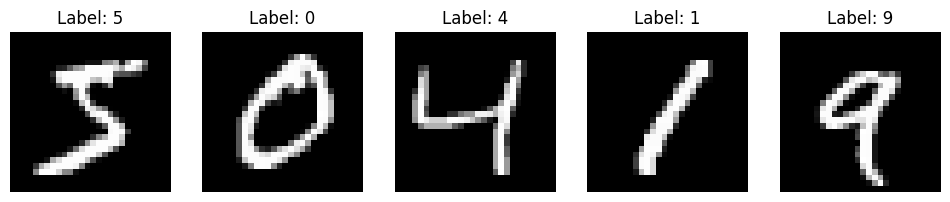

In [9]:
# Display a few sample images
num_samples = 5
plt.figure(figsize=(12, 4))

for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(train_images[i], cmap="gray")
    plt.title(f"Label: {train_labels[i]}")
    plt.axis("off")
plt.show()

In [10]:
import numpy as np

np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))

print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

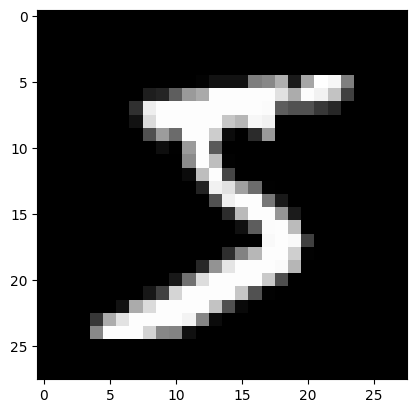

In [11]:
plt.imshow(train_images[0], cmap="gray")

In [12]:
from keras import layers
from keras import models


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

model.summary()

c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

## Convolutions

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# layers.Conv2d

def conv2d(image, kernel): # kernels = filters
    # Extract dimentions
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate output dimentions
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    # Initialize the output with zeros
    output = np.zeros((output_height, output_width))

    # Perform the convolution
    for i in range(output_height):
        for j in range(output_width):
            # Extract the region of the image that corresponds to the current convolution window
            image_patch = image[i:i + kernel_height, j:j + kernel_width]

            # Element-wise multiplication and summation
            output[i, j] = np.sum(image_patch * kernel)

    return output


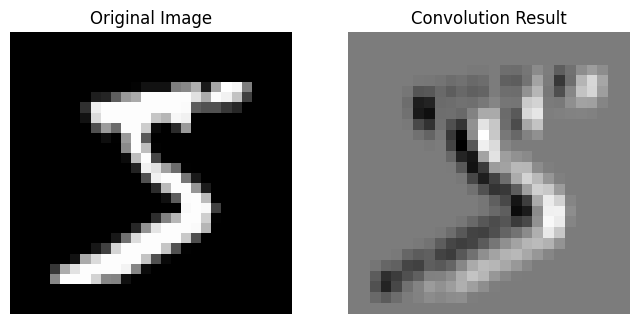

In [14]:
# Load a sample image - "5"
image = train_images[0]

# Define a simple convolutional filter (Sobel edge detection filter)
# https://uk.wikipedia.org/wiki/Оператор_Собеля
sobel_filter = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])

# Normalize the filter to ensure it doesn't affect the scale of the gradients
sobel_filter = sobel_filter / 4.0

# Apply the convolution
result = conv2d(image, sobel_filter)

# Plot the original image and the convolution result
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(result, cmap="gray")
plt.title("Convolution Result")
plt.axis("off")

plt.show()

In [15]:
# Reminder

"""
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    # num_params: kernel_dim * n_neurons + n_bias = (3*3)*32 + 32 = 9*32 +32 = 288 + 32 = 320
    # output: image_length - kernel_length + 1, image_width - kernel_width + 1, n_neurons
...
])
"""
# The filters are learned during the training process.
# As for model processes training examples, the filters' weights are adjusted to capture relevant features
# for the given task, which in your case is likely image classification on the MNIST dataset (handwritten digit recognition)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

## Max Pooling

tf.Tensor([26 26  1], shape=(3,), dtype=int32)
tf.Tensor([13  2 13  2  1], shape=(5,), dtype=int32)


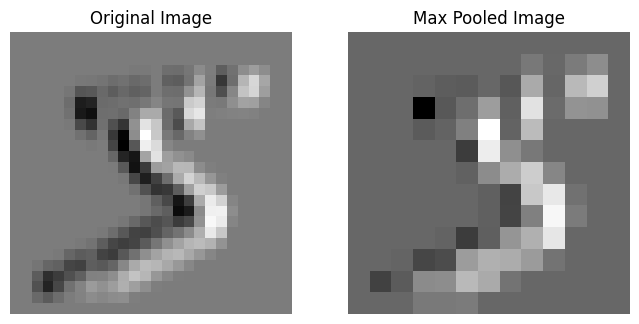

In [16]:
# Select one example from the dataset
# image = train_images[0]
image = result
image = np.expand_dims(image, axis=-1) # Add channel dimension

# Define max pooling function
def max_pooling_2d(input_tensor, pool_size):
    input_shape = tf.shape(input_tensor)
    print(input_shape)
    input_height, input_width, num_channels = input_shape[0], input_shape[1], input_shape[2]

    output_height = input_height // pool_size
    output_width = input_width //pool_size

    # Reshape the input tensor to prepare for max pooling
    reshaped_input = tf.reshape(input_tensor, [output_height, pool_size, output_width, pool_size, num_channels])
    input_shape_after_reshaping = tf.shape(reshaped_input)
    print(input_shape_after_reshaping)

    # Take the max along the pooling window dimensions
    pooled_tensor = tf.math.reduce_max(reshaped_input, axis=[1, 3])
    return pooled_tensor

# Perform max pooling with a pool size of 2x2
pool_size = 2
pooled_image = max_pooling_2d(image, pool_size)

# Plot the original and pooled images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(image), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(pooled_image), cmap="gray")
plt.title("Max Pooled Image")
plt.axis("off")

plt.show()

In [17]:
print(pooled_image)
# print(tf.transpose(pooled_image))

tf.Tensor(
[[[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [27.5]
  [2.25]
  [32]
  [61.8]
  [0]]

 [[0]
  [0]
  [0]
  [-7.5]
  [-16]
  [-20.5]
  [0]
  [-27]
  [110]
  [-2.5]
  [135]
  [172]
  [0]]

 [[0]
  [0]
  [0]
  [-170]
  [-24.2]
  [12]
  [88]
  [-12.2]
  [201]
  [6.5]
  [72.5]
  [68.2]
  [0]]

 [[0]
  [0]
  [0]
  [-20]
  [-7.25]
  [40]
  [250]
  [-7.5]
  [137]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [-70]
  [219]
  [64.8]
  [27]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [-8.75]
  [60.8]
  [113]
  [167]
  [50]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [-11.2]
  [-59]
  [159]
  [211]
  [16]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [-11.5]
  [-57.5]
  [40.8]
  [235]
  [32.5]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [-6]
  [-68.8]
  [-12.5]
  [75]
  [119]
  [207]
  [0.5]
  [0]
  [0]]

 [[0]
  [0]
  [-4.5]
  [-53.5]
  [-44.5]
  [87.2]
  [120]
 

In [18]:
tf.shape(pooled_image)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([13, 13,  1], dtype=int32)>

In [19]:
pooled_image[:, :, 0]

<tf.Tensor: shape=(13, 13), dtype=float64, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 27.5, 2.25, 32, 61.8, 0],
       [0, 0, 0, -7.5, -16, -20.5, 0, -27, 110, -2.5, 135, 172, 0],
       [0, 0, 0, -170, -24.2, 12, 88, -12.2, 201, 6.5, 72.5, 68.2, 0],
       [0, 0, 0, -20, -7.25, 40, 250, -7.5, 137, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, -70, 219, 64.8, 27, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, -8.75, 60.8, 113, 167, 50, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, -11.2, -59, 159, 211, 16, 0, 0],
       [0, 0, 0, 0, 0, 0, -11.5, -57.5, 40.8, 235, 32.5, 0, 0],
       [0, 0, 0, 0, -6, -68.8, -12.5, 75, 119, 207, 0.5, 0, 0],
       [0, 0, -4.5, -53.5, -44.5, 87.2, 120, 113, 84.2, 19.5, 0, 0, 0],
       [0, -61.5, -20.2, 59, 61.8, 135, 110, 20, 0, 0, 0, 0, 0],
       [0, 0, 0, 29.5, 29.8, 33, 0, 0, 0, 0, 0, 0, 0]])>

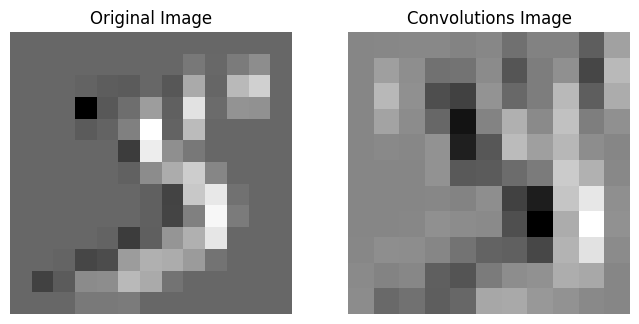

In [20]:
# Another convolution layer
result_2 = conv2d(pooled_image[:, :, 0], sobel_filter)

# Plot the original image and convolutions
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(pooled_image[:, :, 0]), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(result_2), cmap="gray")
plt.title("Convolutions Image")
plt.axis("off")

plt.show()

## Padding

In [21]:
# Select the first example from the dataset
image = train_images[0]
image = np.expand_dims(image, axis=-1) # Add channel dimension

# Print the original image shape
print("Original Image Shape:", image.shape)

# Define the amount of padding for each dimension
pad_height = 4
pad_width = 4

# Pad the image using tf.pad
padded_image = tf.pad(image, paddings=[[pad_height, pad_height], [pad_width, pad_width], [0, 0]])

# Print the padded image shape
print("Padded image shape:", padded_image.shape)

# Plot the original and padded images
plt.figure(figsize=(8, 4))

5214

Original Image Shape: (28, 28, 1)
Padded image shape: (36, 36, 1)


5214

<Figure size 800x400 with 0 Axes>

In [22]:
[[pad_height, pad_height], [pad_width, pad_width], [0, 0]]

[[4, 4], [4, 4], [0, 0]]

## Padding and Striding

In [23]:
model_padded = models.Sequential([
    layers.Conv2D(32, (3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=(28, 28, 1)),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), strides=(1, 1), padding="same", activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), strides=(1, 1), padding="same", activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

model_padded.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,162 (1004.54 KB)

 Trainable params: 257,162 (1004.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# without padding

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

## Flatten

Original Image Shape: (28, 28, 1)
Flattened Image Shape: (784,)


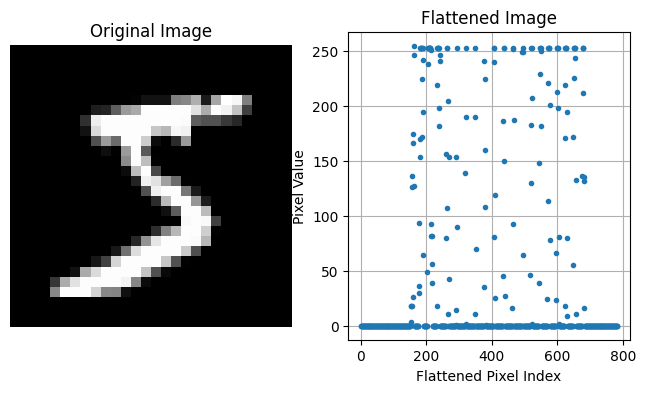

In [25]:
# Select the first example from the dataset
image = train_images[0]
image = np.expand_dims(image, axis=-1) # Add channel dimension

#  Print the original image shape
print("Original Image Shape:", image.shape)

# Flatten the image using tf.reshape
flattened_image = tf.reshape(image, shape=(-1,))

# Print the flattened image shape
print("Flattened Image Shape:", flattened_image.shape)

# Plot the original and flattened images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(image), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.plot(flattened_image.numpy(), marker=".", linestyle="None")
plt.title("Flattened Image")
plt.xlabel("Flattened Pixel Index")
plt.ylabel("Pixel Value")
plt.grid(True)

plt.show()

In [26]:
flattened_image.numpy()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,   0,   0,   0,   0,   0

## Train the final Model

In [27]:
! pip install pydot

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8917 - loss: 0.3541 - val_accuracy: 0.9844 - val_loss: 0.0464
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9840 - loss: 0.0522 - val_accuracy: 0.9886 - val_loss: 0.0384
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9891 - loss: 0.0332 - val_accuracy: 0.9855 - val_loss: 0.0377
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9911 - loss: 0.0269 - val_accuracy: 0.9918 - val_loss: 0.0246
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9937 - loss: 0.0193 - val_accuracy: 0.9910 - val_loss: 0.0297
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9951 - loss: 0.0152 - val_accuracy: 0.9918 - val_loss: 0.0268
This took 37.684590578079224 seconds to run


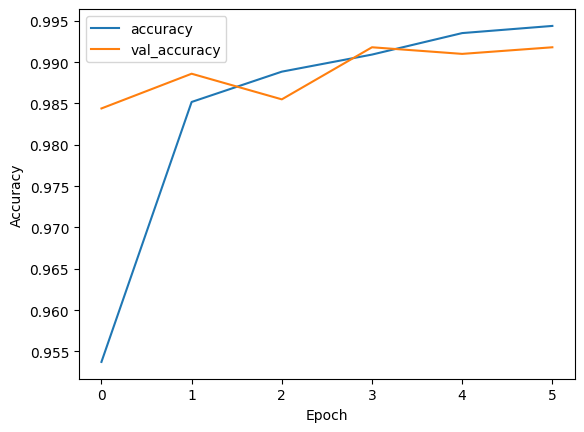

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import time


# Load dataset (e.g., CIFAR-10 for simplicity)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create a simple CNN model
from keras import models
from keras import layers

## TODO compare CPU to GPU

time_start = time.time()

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])


# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Visualize the model architecture
plot_model(model, to_file="cnn_model.png", show_shapes=True, show_layer_names=True)

# Train the model
history = model.fit(train_images, train_labels, epochs=6, validation_data=(test_images, test_labels))
time_end = time.time()

print(f"This took {time_end - time_start} seconds to run")

#Visualize the training process
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [29]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9884 - loss: 0.0375
Test Accuracy: 0.9918000102043152


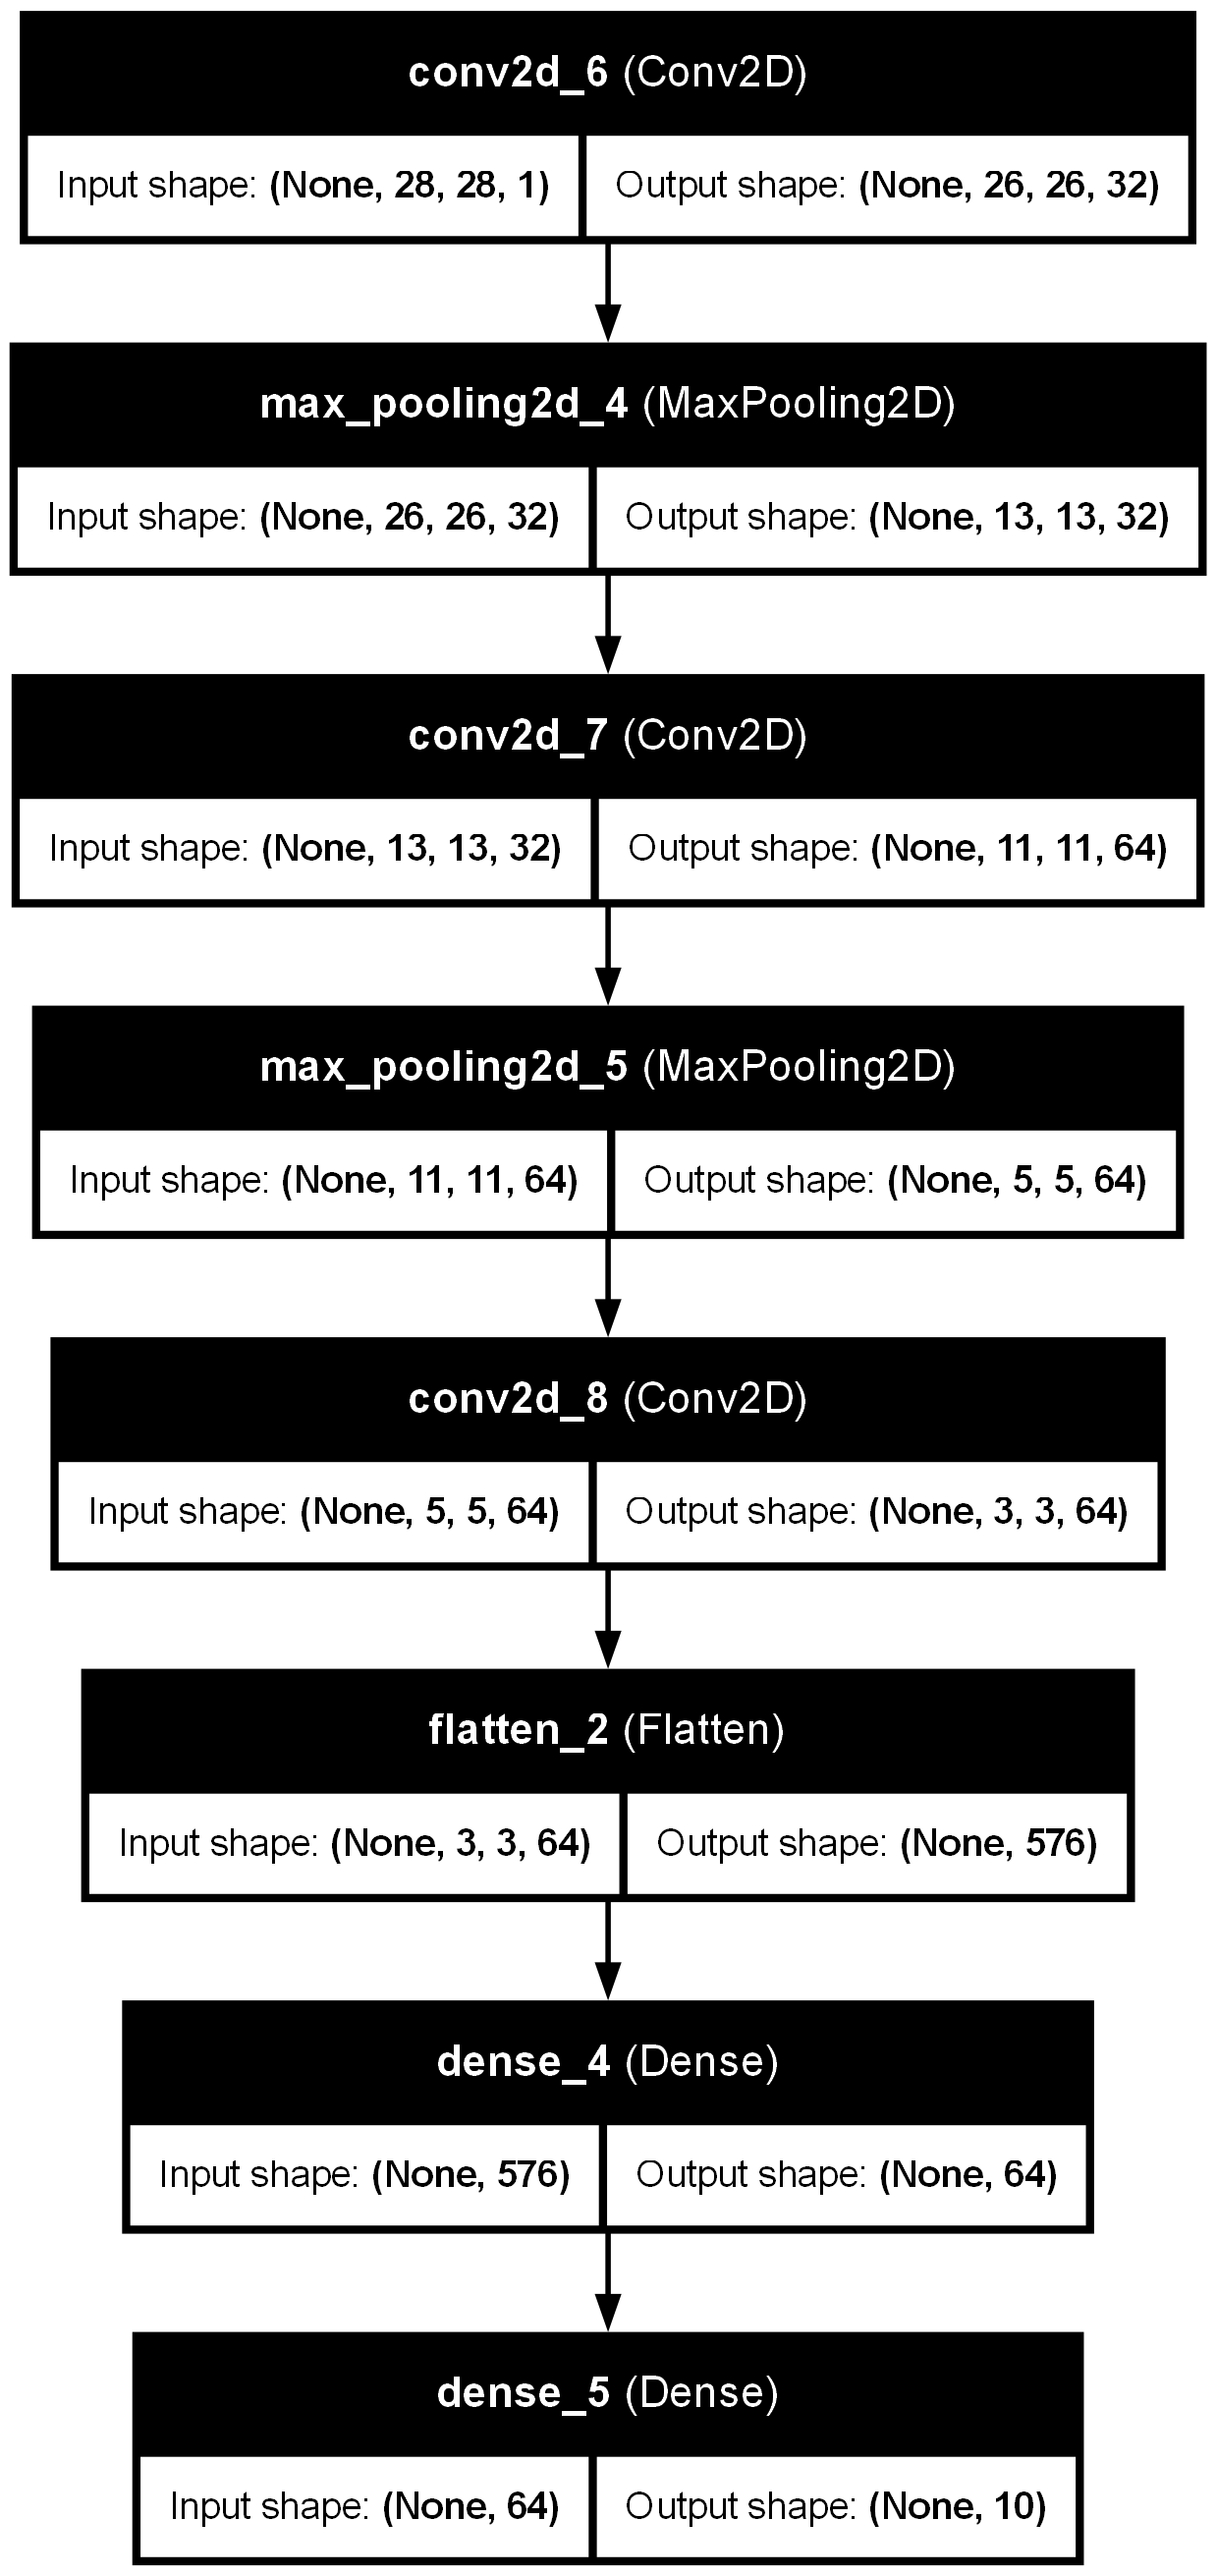

In [30]:
plot_model(model, to_file="cnn_model.png", show_shapes=True, show_layer_names=True)

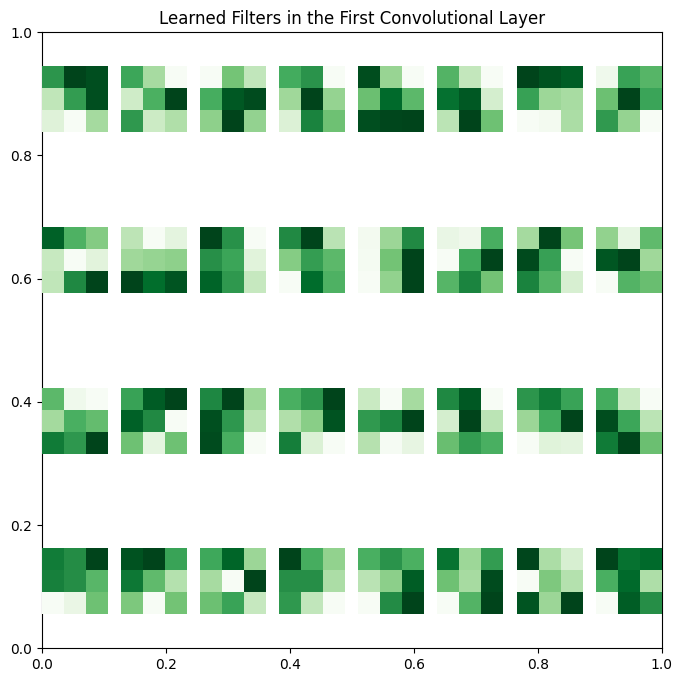

In [38]:
# Extract the filters from the first convolutional layer
filters = model.layers[0].get_weights()[0]

# Visualize the learned filters
# Learned filters:
# The first part of the code visualizes the learned filters from the first convolutional layer. Each filter is a small matrix
# of weights that slides over the input image, capturing different features

plt.figure(figsize=(8, 8))
plt.title("Learned Filters in the First Convolutional Layer")
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters[:, :, 0, i], cmap="Greens")
    plt.axis("off")
plt.show()

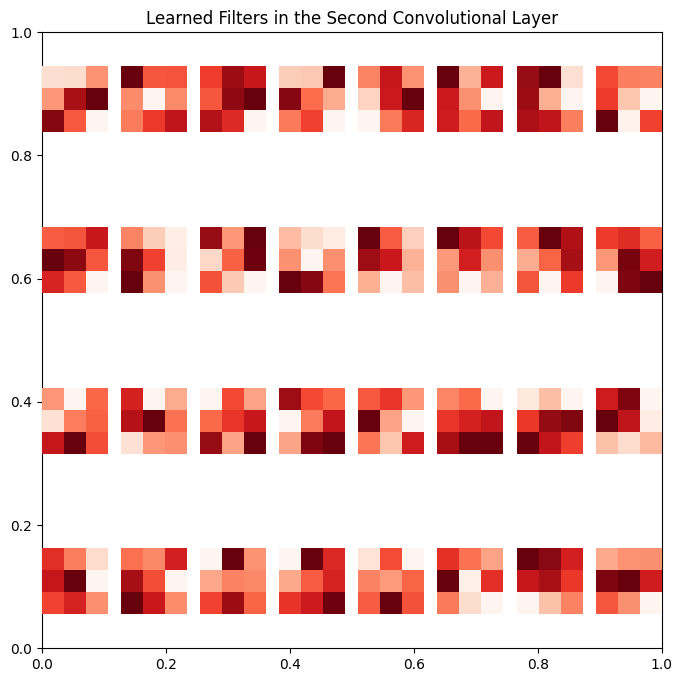

In [37]:
# Extract the filters from the second convolutional layer
filters_2 = model.layers[2].get_weights()[0]

# Visualize the learned filters
# Learned filters:
# The first part of the code visualizes the learned filters from the second convolutional layer. Each filter is a small matrix
# of weights that slides over the input image, capturing different features

plt.figure(figsize=(8, 8))
plt.title("Learned Filters in the Second Convolutional Layer")
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters_2[:, :, 0, i], cmap="Reds")
    plt.axis("off")
plt.show()

In [39]:
filters

array([[[[0.0384, 0.0566, -0.224, 0.0677, 0.109, 0.026, 0.215, -0.31, 0.245, -0.132, 0.216, 0.0762, -0.347, -0.233, -0.0936, 0.00579, 0.0221, 0.00615, 0.0639, -0.0191, -0.105, 0.0896, 0.0723, 0.0233, 0.0943, 0.172, 0.0244, 0.299, 0.0122, 0.0815, 0.131, 0.116]],

        [[0.192, -0.0426, -0.0415, 0.136, -0.0997, -0.125, 0.193, 0.103, 0.0272, -0.287, 0.0632, 0.16, -0.127, -0.259, 0.192, -0.0617, -0.258, 0.0756, 0.172, 0.0385, -0.215, 0.183, 0.124, -0.199, 0.0638, 0.196, 0.0705, -0.00812, 0.0714, -0.0769, -0.0628, 0.08]],

        [[0.174, -0.163, -0.127, -0.354, -0.247, -0.251, 0.176, 0.0429, -0.0674, -0.218, -0.34, -0.0817, 0.0995, 0.106, -0.0341, 0.0347, -0.287, 0.0951, -0.109, 0.201, -0.0511, -0.309, 0.0449, -0.342, 0.178, 0.00669, -0.0195, -0.165, 0.0111, 0.0252, -0.11, 0.0876]]],


       [[[-0.195, -0.0881, 0.000293, -0.0961, -0.0552, 0.156, 0.0531, 0.00638, -0.21, -0.0812, 0.0671, -0.0271, -0.354, -0.297, 0.182, 0.121, -0.0833, 0.0714, 0.155, -0.174, 0.103, -0.207, -0.0872, 0.236